<a href="https://colab.research.google.com/github/aayushbhurtel/Numerical-Methods/blob/main/BhurtelAayush_4413_Lesson7_Integration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Numerical Method CPSMA 441 Prof: Nicholas Jacobs

Member(s): Hoang Tan Truong, Aakriti Khadka, Aayush Bhurtel, Jordan Moreno

# Project Module 7: Integration

our orginal function was:


          f(x) = ln(x+1)

let us set interval of [4,8] and find the area under the curve.

lets load the required libraries.

In [13]:

import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
import pandas as pa
import math
from prettytable import PrettyTable


lets graph the above function first. Here I have created a function which takes an argument as x and returns the numpy result of log(x+1). Next, I set the values for X-axis and Y-axis using linespace funtion of numpy. Rest is simply plotting the values and labeling them.

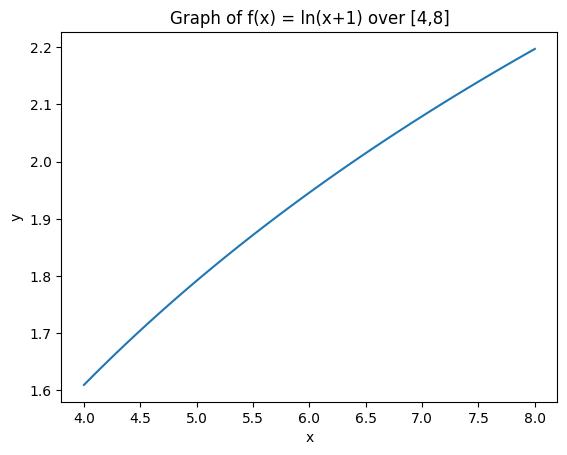

In [14]:
def function(x):
    return np.log(x+1)

x = np.linspace(4, 8, 100)
y = function(x)

plt.plot(x, y)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Graph of f(x) = ln(x+1) over [4,8]")

plt.show()

Now, I am going to use scipy package to integrate the function

f(x) = ln(x+1).

First, we define the function, func which takes x as a argument.

we define the limits with lower at 4 and higher at 8.

Now, we use the quad function to calculate integral with parameters of func function and both lower and upper limit.


In [15]:
def func(x):
    return np.log(x+1)
a = 4 ; b = 8

result, error = integrate.quad(func, a, b)  # from scipy package

print("Integral is:", result)

Integral is: 7.727831633855475


Lets do this by hand.

\begin{align}
A &= \int_4^8 \ln(x+1) dx \\
&= \int_4^8 \ln(u) du && \\
{(Applying \;u-substitution\;with\;(u = x+1)}\\
&= \left[u\ln(u) - \int du\right]_5^9 && \\{(Using\;integration\;by\;parts)} \\
&= \bigg[u\ln(u) - u\bigg]_5^9 && \\
&= 18\ln(3) - 4 - 5\ln(5) && \\
&\approx 7.7278 &&
\end{align}



Here I created a riemannSum function which takes an arguement with interval of [4,8]. declared variables and width with formula, created a for-loop to calculate the sum and returned it at the end of function.

Defined another function called func which returns the value of ln(x+1) for a given x. Then we pass the function as a argument to intregrate.quad function.

Next, I used a prettyTable package to create a pretty table as a output. I used a for loop to loop through with pre defined values to create a table for riemann sum. 

In [16]:
import math
import scipy.integrate as integrate
from prettytable import PrettyTable

def riemann_sum(n):
    a = 4
    b = 8
    width = (b - a) / n  # width of each rectangle
    x = a
    sum = 0  # initialize sum and starting point

    for i in range(n): # Right Endpoint
        x += width # move to the right endpoint
        sum += math.log(x + 1) * width  # add area of rectangle

    return sum

def func(x):
    return math.log(x + 1)

exact_value, _ = integrate.quad(func, 4, 8)

print("Exact value: {:.4f}".format(exact_value))

table = PrettyTable()
table.field_names = ["Number of rectangles", "Riemann sum", "Error"]

for n in [10, 50, 100, 150, 200]:
    approx_value = riemann_sum(n)
    error = abs(approx_value - exact_value)
    table.add_row([n, "{:.4f}".format(approx_value), "{:.4f}".format(error)])

print(table)


Exact value: 7.7278
+----------------------+-------------+--------+
| Number of rectangles | Riemann sum | Error  |
+----------------------+-------------+--------+
|          10          |    7.8442   | 0.1164 |
|          50          |    7.7513   | 0.0235 |
|         100          |    7.7396   | 0.0117 |
|         150          |    7.7357   | 0.0078 |
|         200          |    7.7337   | 0.0059 |
+----------------------+-------------+--------+


Create an algorithm for computing either the trapezoid or simpson’s rule. Make sure to be able
to change the number of intervals.

In [23]:
def f(x):
    return math.log(x+1)

def deltaX(a,b,n):
    return (b-a)/n

def rmSum(function, a, b, n, choice = 'right'):
    dx = deltaX(a,b,n)
    if choice == 'right':
        start=1
    elif choice == 'left':
        start=0
    elif choice == 'mid':
        start = 0
    sum = 0
    for i in range(start, n+start):
        if choice != 'mid':
            sum = sum + function(a+i*dx)*dx
        else:
            sum = sum + function(a+(i+0.5)*dx)*dx
    return sum

In [24]:
rmSum(f,0,np.pi,10,'right')

2.9609534992659325

In [25]:
rmSum(f,1,4,10,'left')

3.5212042061696383

In [26]:
rmSum(f,1,4,10,'mid')

3.6620179146560967

CREATE A TABLE WITH DIFFERENT METHOD AND NUMBER OF RECT

In [27]:
def simpsonOneThird(function,a,b,n):
    dx = deltaX(a,b,n)
    sum = 0
    sum = sum + function(a)
    sum = sum + function(b)
    for i in range(n):
        if i==a or i==b:
            continue
        elif i != a and i != b and i%2 == 0:
            sum = sum + 2*function(a+dx*i)
        elif i != a and i != b and i%2 != 0:
            sum = sum + 4*function(a+dx*i)
    sum = dx/3*sum
    return sum

In [28]:
rmSum(f,1,4,10,'left')

3.5212042061696383

In [29]:
simpsonOneThird(f, 1, 4, 10)

3.2337206311138202

In [30]:
rmSum(f,1,4,10,'right')

3.796091425731884

In [31]:
rmSum(f,1,4,10,'mid')

3.6620179146560967

In [32]:
numOfRect = [5,10,15,100,1000]

Report

In conclusion, we found the area under the curve of are orginal function: f(x) = ln(x+1) with an interval between [4,8].
We then used intergrate.quad to cheack are answer, which was about 7.7278. The answer that intergrate.quad got was the same as ours.
After we got the answer for our function, we then created a riemann sum using the right endpoints.
As you can see in the chart, when we used a different number of rectangles we got a different error.
Also, you can see that the more rectangles we used, the more error we got.
We also created an algorithm for computing Simpson's rule.
We used this algorithm for are function on the interval [1,4], with 10 subintervals. We calculated the answer to be about .8151719.
Given a strictly increasing function, decreasing, or undulating function, we would use Simpson's rule.
The reason why is because the trapezoidal rule mostly defines the average of the left and right hand of the riemann sums.
While simpson's rule defines the weighted average that gives the accurate approximation because in simpson's rule quadratic approximaions is used.
Trapezoidal rule uses linear approximation which gives less accurate results than quadratic approximation.